# INSURANCE CLAIMS DATA

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dte
import seaborn as sns
import re
from scipy import stats as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline
# set seabor graphs to a better style
sns.set(style="ticks")

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data=pd.read_csv('C:/Users/DELL/Downloads/Basic Data Manipulation - Visualization Exercise/Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demog=pd.read_csv('C:/Users/DELL/Downloads/Basic Data Manipulation - Visualization Exercise/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')


In [3]:
claims_data.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
620,78221963,84147585,Driver error,04/10/2018,Auto,Yes,Injury only,$14430,4.0,No
852,58366436,39405635,Other causes,05/09/2017,Auto,Unknown,Material and injury,$45540,1.0,Yes
555,31609133,25550440,Natural causes,03/08/2018,Auto,Unknown,Material and injury,$17721.5,1.0,Yes
184,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,NaN,1.0,Yes
369,3311108,49481916,Other causes,09/19/2018,Auto,No,Material only,NaN,2.0,Yes


In [4]:
cust_demog.sample(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
109,94448966,Female,20-Jun-84,MD,845-768-2513,Gold
133,39943087,Female,11-Nov-88,NY,473-567-7234,Platinum
435,30154531,Male,16-Nov-74,MA,482-654-2465,Platinum
689,41106063,Male,26-Mar-88,FL,284-876-9462,Gold
295,53900680,Male,06-Mar-99,MA,591-168-3457,Silver


#### 2. Perform a data audit for the datatypes and find out if there are anymismatch within the current datatypes of the columns and their business significance.


In [5]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [6]:
cust_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [7]:
# Observations about datatypes:

# a. In claims_data variable claim_date and claim_amount needs to be in datetime and float type respectively.
# b. In cust_demog variable DateOfBirth needs to be in datetime type.


#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [8]:
claims_data.claim_amount=claims_data.claim_amount.str.replace('$','').astype('float')
claims_data.claim_date=pd.to_datetime(claims_data.claim_date, format='%m/%d/%Y')
cust_demog.DateOfBirth=pd.to_datetime(cust_demog.DateOfBirth, format='%d-%b-%y')


# Mering two data_sets to see the dob and claim-dates simultaneously 

insurance_claims_data=claims_data.merge(right=cust_demog,how='outer',left_on='customer_id',right_on='CUST_ID')

In [9]:
#filtering records : where dateofbirth.year>2024 and is greater than claim_date.year
# filling filtered records by: subtracting 100 years in dateofbirth OF Customer
insurance_claims_data.DateOfBirth=np.where((insurance_claims_data.DateOfBirth.dt.year>2024)&(insurance_claims_data.DateOfBirth.dt.year>insurance_claims_data.claim_date.dt.year),insurance_claims_data.DateOfBirth - pd.DateOffset(years=100),insurance_claims_data.DateOfBirth)

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
insurance_claims_data['alert_flag']=np.where((insurance_claims_data.claim_type=='Injury only')&(insurance_claims_data.police_report=='No'),1,0)

#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [11]:
insurance_claims_data.sort_values(by=['claim_date','customer_id'], ascending=[False,True]).reset_index(drop=True).drop_duplicates(subset='customer_id', keep='first', inplace=True)

#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [12]:
#checking for missing values in data
insurance_claims_data.isna().sum()

claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [13]:
#imputing the missing values
cat_cols=['incident_cause', 'claim_area', 'police_report', 'claim_type','fraudulent', 'gender', 'State', 'Contact', 'Segment']
conti_cols=['claim_amount', 'total_policy_claims','alert_flag']
for i in cat_cols:
    insurance_claims_data[i] = insurance_claims_data[i].fillna(insurance_claims_data[i].mode()[0])
    
insurance_claims_data[conti_cols] = insurance_claims_data[conti_cols].fillna(insurance_claims_data[conti_cols].mean())

#confiming imputaion:
for i in cat_cols:
    print(insurance_claims_data[i].isna().sum()) 
for j in conti_cols:
    print(insurance_claims_data[j].isna().sum())


0
0
0
0
0
0
0
0
0
0
0
0


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18,
Youth 18-30,
Adult 30-60,
Senior > 60

In [14]:
#calculations of age:
insurance_claims_data['age']=pd.Timestamp.now().year-insurance_claims_data.DateOfBirth.dt.year


In [15]:
col='age'
cond=[insurance_claims_data[col]>60,(insurance_claims_data[col]<=60)&(insurance_claims_data[col]>30),(insurance_claims_data[col]<=30)&(insurance_claims_data[col]>18),insurance_claims_data[col] <=18]
choices=['Senior','Adult','Youth','Children']
insurance_claims_data["Age_category"]=np.select(cond,choices,default=np.nan)
insurance_claims_data.sample(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,Age_category
212,43722644.0,36395486.0,Other causes,2017-01-07,Home,No,Material only,3335.000000,3.0,Yes,36395486.0,Male,1971-03-06,ND,365-482-4683,Gold,0,53.0,Adult
795,72238494.0,63238733.0,Other causes,2017-09-07,Auto,No,Injury only,12442.125121,1.0,No,63238733.0,Female,1993-09-08,AZ,268-398-8256,Gold,1,31.0,Adult
1049,67060119.0,12015897.0,Driver error,2018-10-09,Auto,Unknown,Material only,2270.000000,6.0,No,12015897.0,Male,1971-11-16,WA,465-854-9358,Silver,0,53.0,Adult


#### 8. What is the average amount claimed by the customers from various segments?

In [16]:
insurance_claims_data.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12745.668485
1,Platinum,12341.725348
2,Silver,12208.394241


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [17]:
round(insurance_claims_data[insurance_claims_data.claim_date<=(pd.Timestamp('01-oct-2018')+pd.DateOffset(days=-20))].groupby('incident_cause')['claim_amount'].sum(),2).reset_index()

,incident_cause,claim_amount
0,Crime,729472.63
1,Driver error,3348655.50
2,Natural causes,1316440.63
3,Other causes,3779869.38
4,Other driver error,3384045.13


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [18]:
temp=insurance_claims_data[(insurance_claims_data.State.isin(['TX', 'DE', 'AK']))&(insurance_claims_data.incident_cause=='Driver error')].groupby('Age_category')['claim_amount'].sum().reset_index()
round(temp[temp.Age_category=='Adult'],2)

,Age_category,claim_amount
0,Adult,220554.38


#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

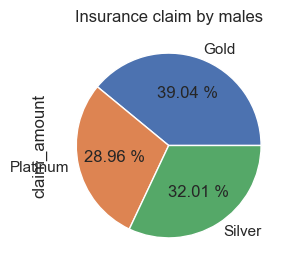

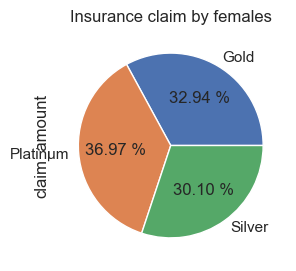

In [19]:
#pie_chart_data
male_data=insurance_claims_data[insurance_claims_data.gender=='Male'].groupby(['Segment'])['claim_amount'].sum()
female_data=insurance_claims_data[insurance_claims_data.gender=='Female'].groupby(['Segment'])['claim_amount'].sum()
# pie plots

male_data.plot(kind='pie',legend = False, figsize = (6,3), autopct='%0.2f %%' )
plt.title('Insurance claim by males')
plt.show()
female_data.plot(kind='pie', legend = False, figsize = (6,3), autopct='%0.2f %%')
plt.title('Insurance claim by females')
plt.show()



#### 12. Among males and females, which gender had claimed the most for anytype of driver related issues?
 E.g. This metric can be compared using a bar chart

In [20]:
tmp=insurance_claims_data[insurance_claims_data.incident_cause.isin(['Driver error', 'Other driver error'])].groupby('gender').agg({'gender':'count'}).add_prefix('count_of_').reset_index()
tmp

,gender,count_of_gender
0,Female,222
1,Male,289


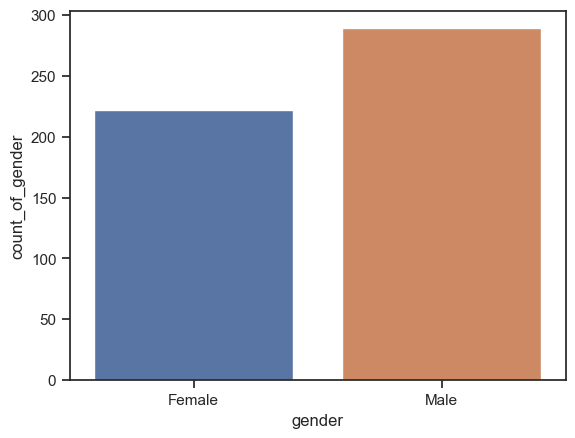

In [21]:
sns.barplot(x = "gender", y = "count_of_gender", data = tmp )
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [22]:
fraudulent_data=insurance_claims_data[insurance_claims_data.fraudulent=='Yes'].groupby('Age_category').agg({'total_policy_claims':'sum'}).reset_index()

fraudulent_data

,Age_category,total_policy_claims
0,Adult,318.591743
1,Senior,50.000000
2,Youth,61.000000
3,nan,15.000000


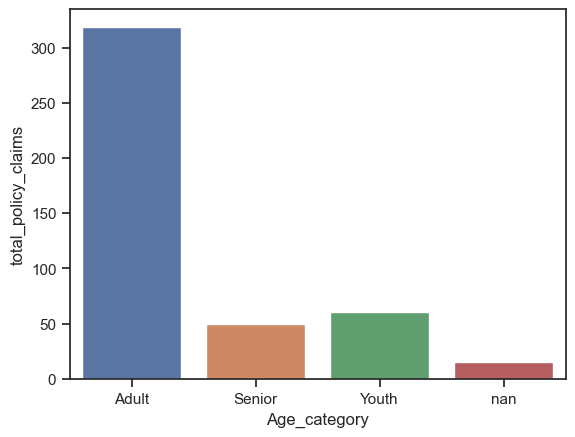

In [23]:
#bar plot:
sns.barplot(x = "Age_category", y = "total_policy_claims", data = fraudulent_data )
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
#Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

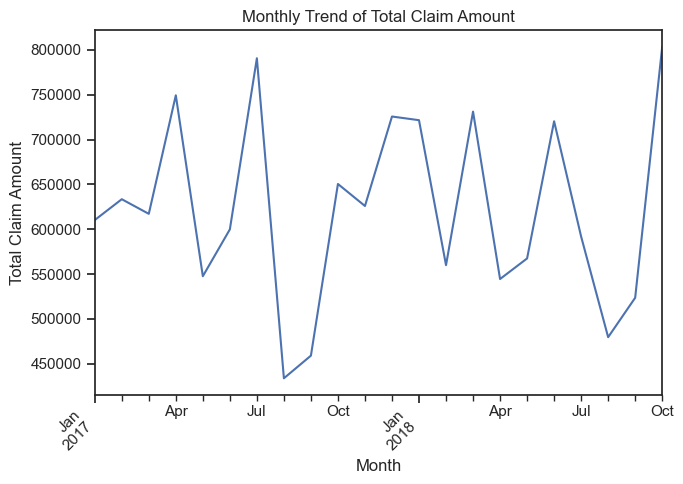

In [24]:
insurance_claims_data['claim_date'] = pd.to_datetime(insurance_claims_data['claim_date'], format='%m/%d/%Y')

monthly_claims = insurance_claims_data.groupby(insurance_claims_data['claim_date'].dt.to_period('M'))['claim_amount'].sum()

fig, ax = plt.subplots(figsize=(7,5))
monthly_claims.plot(kind='line',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Monthly Trend of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 


In [25]:
avg_claim_amount = insurance_claims_data.groupby(['gender', 'Age_category', 'fraudulent'])['claim_amount'].mean().reset_index()
avg_claim_amount


,gender,Age_category,fraudulent,claim_amount
0,Female,Adult,No,12093.893858
1,Female,Adult,Yes,12645.473129
2,Female,Children,No,12442.125121
3,Female,Senior,No,13339.780325
4,Female,Senior,Yes,3332.294118
5,Female,Youth,No,13136.789862
6,Female,Youth,Yes,10137.140640
7,Male,Adult,No,12179.423750
8,Male,Adult,Yes,15595.487121
9,Male,Senior,No,10868.238378


C:\Users\DELL\AppData\Local\Temp\ipykernel_10132\3479164672.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_category', y='claim_amount', hue='gender', data=avg_claim_amount, ci=None)


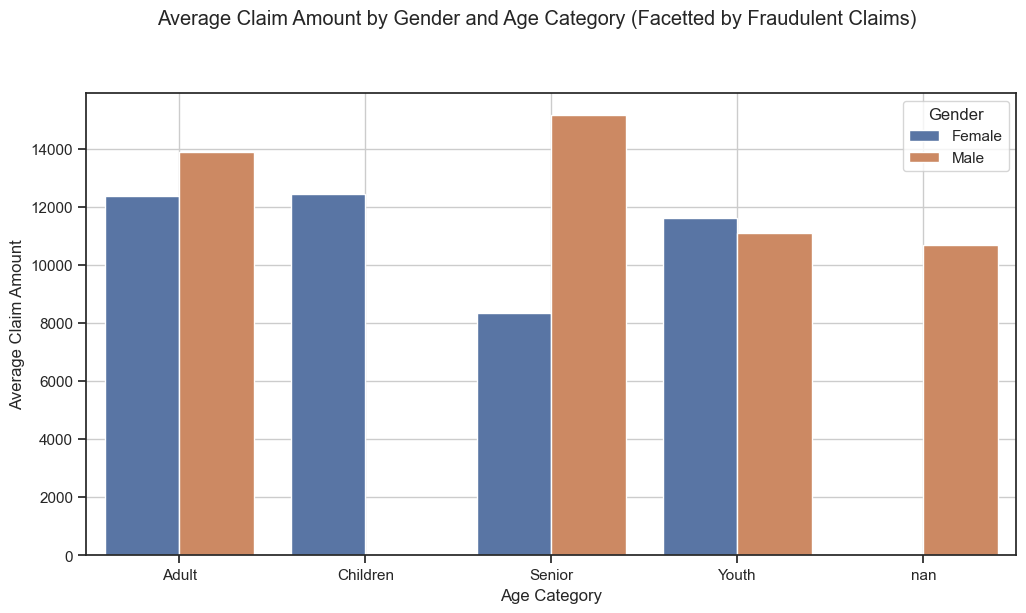

In [26]:
# Facetted bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_category', y='claim_amount', hue='gender', data=avg_claim_amount, ci=None)
plt.xlabel('Age Category')
plt.ylabel('Average Claim Amount')
plt.suptitle('Average Claim Amount by Gender and Age Category (Facetted by Fraudulent Claims)', y=1.02)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.grid(True)
plt.show()



## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. 
Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

#### 16. Is there any similarity in the amount claimed by males and females?

In [27]:
male_data=insurance_claims_data[insurance_claims_data.gender=='Male'].groupby(['Segment'])['claim_amount'].sum()
male_data

Segment
Gold        2.861606e+06
Platinum    2.122983e+06
Silver      2.346240e+06
Name: claim_amount, dtype: float64

In [28]:
female_data=insurance_claims_data[insurance_claims_data.gender=='Female'].groupby(['Segment'])['claim_amount'].sum()
female_data

Segment
Gold        2.121950e+06
Platinum    2.381747e+06
Silver      1.938906e+06
Name: claim_amount, dtype: float64

In [29]:
# Observations from datasets male_data and female_data

# Ho(null hypothesis): No similarity in the amount claimed by males and females
# Ha(alternative hypothesis): there is similarity in the amount claimed by males and females
# number of observations are <30 : wee will perfom t-test.
# alpha=0.05 (confidence interval is 95%)
# we need to check the p value: if it is >alpha then We fail to reject null hypothesis.

In [30]:
eq_var = stats.ttest_ind(a= male_data,b= female_data,equal_var=True)    # equal variance
print(f'equal-variance value is(t-value) : {eq_var.statistic}')
uneq_var = stats.ttest_ind(a= male_data,b= female_data,equal_var=False)    # unequal variance
print(f'unequal-variance value is(t-value) : {uneq_var.statistic}')

equal-variance value is(t-value) : 1.1672451321667465
unequal-variance value is(t-value) : 1.1672451321667465


In [31]:
#The t score of the variables is very similar thus we will consider it as equal variance

In [32]:
t_val= eq_var.statistic
p_val= eq_var.pvalue
print(f"For the above test, the t-score is {t_val} and the p-value is {p_val}")

if(p_val<0.05):
    print('We reject null hypothesis')
    print('As p-value<0.05, By t-test we concluded that No similarity in the amount claimed by males and females')
else:
    print('We fail to reject null hypothesis')
    print('As p-value>0.05, By t-test we concluded that There is similarity in the amount claimed by males and females')

For the above test, the t-score is 1.1672451321667465 and the p-value is 0.3079478116083584
We fail to reject null hypothesis
As p-value>0.05, By t-test we concluded that There is similarity in the amount claimed by males and females


#### 17. Is there any relationship between age category and segment?

In [33]:

# Observations from datasets male_data and female_data

# H0= No relation between Age_category and segment
# Ha= There is a relationship between Age_category and segment
# To find out this relationship we will use Chi Square test
# alpha=0.05 (confidence interval is 95%)
# we need to check the p value: if it is >alpha then We fail to reject null hypothesis.

In [34]:
age_seg_combo=pd.crosstab(insurance_claims_data.Age_category, insurance_claims_data.Segment)
age_seg_combo

Segment,Gold,Platinum,Silver
Age_category,,,
Adult,282,271,260
Children,0,0,1
Senior,38,34,30
Youth,56,60,60
nan,15,0,0


In [35]:
chisqr_test = stats.chi2_contingency(age_seg_combo)
chisqr_test

Chi2ContingencyResult(statistic=31.04087346356428, pvalue=0.0001381692922087835, dof=8, expected_freq=array([[287.15718157, 268.06233062, 257.7804878 ],
       [  0.35320687,   0.32971996,   0.31707317],
       [ 36.02710027,  33.63143631,  32.34146341],
       [ 62.16440831,  58.03071364,  55.80487805],
       [  5.29810298,   4.94579946,   4.75609756]]))

In [48]:
print(f'The chi-square stat is {chisqr_test[0]} and the p-value is {chisqr_test[1]}')
p_val=chisqr_test[1]
if(p_val<0.05):
    print('We reject null hypothesis')
    print('As p-value<0.05, By chi-square test: there is relation between Age_category and segment')
else:
    print('We fail to reject null hypothesis')
    print('As p-value>0.05, By chi-square test: No relation between Age_category and segment')

The chi-square stat is 31.04087346356428 and the p-value is 0.0001381692922087835
We reject null hypothesis
As p-value<0.05, By chi-square test: there is relation between Age_category and segment


#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [37]:
# Here we have to check relationship between two continuos variables so will check the pearson correlation coeffecient.
# The H0=  No relationship between the 2016-17 claim amounts and current_year_2018 claim amounts,
# Ha= there is relationship between the 2016-17 claim amounts and current_year_2018 claim amounts;
# CI= 95%, alpha =0.05
# population_Mean=10000 

In [38]:

amt_current_year_2018=insurance_claims_data.loc[insurance_claims_data['claim_date'].dt.year==2018]['claim_amount']
amt_last_year_2017= insurance_claims_data.loc[insurance_claims_data['claim_date'].dt.year==2017]['claim_amount']
#stats.pearsonr(amt_current_year_2018,amt_last_year_2017)


In [39]:
# Not able to perfom because of unequal number of observationstion the datasets

#### 19. Is there any difference between age groups and insurance claims?

In [40]:
# Here we will perform ANOVA (f_test)
# H0 : No difference between age groups and insurance claims
# Ha : There is some difference between age groups and insurance claims

youth = insurance_claims_data['total_policy_claims'].loc[insurance_claims_data['Age_category']=="Youth"]
adult = insurance_claims_data['total_policy_claims'].loc[insurance_claims_data['Age_category']=="Adult"]
children = insurance_claims_data['total_policy_claims'].loc[insurance_claims_data['Age_category']=="Children"]
Senior = insurance_claims_data['total_policy_claims'].loc[insurance_claims_data['Age_category']=="Senior"]

In [41]:
anova = stats.f_oneway(youth,adult,children,Senior)

f_val = anova.statistic
p_val = anova.pvalue
print(f'The f-value is {f_val} and the p-value is {p_val}')
if(p_val<0.05):
    print('We reject null hypothesis')
    print('As p-value<0.05, By anova/f-test: There is some difference between age groups and insurance claims')
else:
    print('We fail to reject null hypothesis')
    print('As p-value>0.05, By anova/f-test: No difference between age groups and insurance claims ')

The f-value is 0.3828181450434234 and the p-value is 0.7654105970837555
We fail to reject null hypothesis
As p-value>0.05, By anova/f-test: No difference between age groups and insurance claims 


In [42]:
#20. Is there any relationship between total number of policy claims and the claimed amount?

In [49]:
print(f'correlation =  {insurance_claims_data.total_policy_claims.corr(insurance_claims_data.claim_amount)}')

print('As the correlation is negative.it means the number of policy claims in inversely propotional to the claimed amount.')

correlation =  -0.019490781428136705
As the correlation is negative.it means the number of policy claims in inversely propotional to the claimed amount.
